<div dir="rtl">
    <h1>تجهيز البيانات وتنظيفها</h1>
    <p>في هذه الخطوة، سيتم تحميل البيانات من الملف (Excel أو CSV)، تنظيفها وإعدادها للتحليل. يتضمن ذلك إزالة القيم المفقودة، ترميز المتغيرات الفئوية (مثل الجنس والعمر)، وضمان أن البيانات صالحة للاستخدام في التحليل الإحصائي. الهدف من هذه الخطوة هو التأكد من أن البيانات في شكل مناسب للتحليل من حيث الوضوح والدقة</p>
</div>

# Packages we will use  
- pandas 
- matplotlib
- seaborn
- statsmodels
- scipy
- openpyxl

In [2]:
# استيراد المكتبات
import pandas as pd

In [3]:
# Load the data from the Excel file
file_path = 'Xiriirka ka dhaxeya baraha bulshada iyo amniga.xlsx'
data = pd.read_excel(file_path)

# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Remove the Timestamp and Email Address columns if they exist
data_cleaned = data.drop(columns=["Timestamp", "Email Address"], errors='ignore')

# Remove duplicate columns
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]

# Define response mapping for general transformation
response_map = {
    'Waan ku raacsanahay': 1,
    'Ilaa xad ayaan ku raacsanahay': 0.5,
    'Kuma raacsani': 0
}

# Define special transformations for categorical columns
gender_map = {'Lab': 1, 'Dheddig': 0}
age_group_map = {
    'Ka yar 20 Sano': 1,
    '20 - 29 Sano': 2,
    '30 - 39 Sano': 3,
    '40 - 49 Sano': 4,
    'Ka weyn 50 Sano': 5
}
education_map = {
    'Dugsiga Sare': 1,
    'Dibloma': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}
profession_map = {
    'Amniga': 1,
    'Warbaahin': 2,
    'Akademi': 3,
    'Arday': 4
}
experience_map = {
    'Ka yar 1 sano': 1,
    '1–3 sano': 2,
    '4–6 sano': 3,
    'Ka badan 6 sano': 4
}
social_media_hours_map = {
    'Ka yar 1 saac': 1,
    '1–3 saacadood': 2,
    '4–6 saacadood': 3,
    'Ka badan 6 saacadood': 4
}

# Loop through all columns and apply transformation to relevant columns
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':  # Check if the column contains strings/text
        # Apply the transformation using the response_map for columns containing responses
        if column in response_map:
            data_cleaned[column] = data_cleaned[column].map(response_map)
            # Fill NaN values with the default value (0 for "Kuma raacsani")
            data_cleaned[column] = data_cleaned[column].fillna(0)
        
        # Apply special transformations for categorical columns
        elif column == 'Jinsigaada ( الجنس )':
            data_cleaned[column] = data_cleaned[column].map(gender_map)
            data_cleaned[column] = data_cleaned[column].fillna(0)  # Fill NaN with 0 (Dheddig)
        
        elif column == 'Da\'daada ( الفئة العمرية)':
            data_cleaned[column] = data_cleaned[column].map(age_group_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # Fill NaN with 1 (Ka yar 20 Sano)
        
        elif column == 'Heerka Waxbarasho ( المؤهل العلمي )':
            data_cleaned[column] = data_cleaned[column].map(education_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # Fill NaN with 1 (Dugsiga Sare)
        
        elif column == 'Xirfadda Shaqado ( المجال المهني )':
            data_cleaned[column] = data_cleaned[column].map(profession_map)
            data_cleaned[column] = data_cleaned[column].fillna(4)  # Fill NaN with 4 (Arday)
        
        elif column == 'Sanadaha Khibradeed aad uleedahay dhanka warbaahinta ama amniga ( عدد سنوات الخبرة في المجال الأمني أو الإعلامي )':
            data_cleaned[column] = data_cleaned[column].map(experience_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # Fill NaN with 1 (Ka yar 1 sano)
        
        elif column == 'Saacadaha Aad Maalin kasta Ku Qaatid Isticmaalka Baraha Bulshada ( عدد ساعات استخدام شبكات التواصل يوميًا )':
            data_cleaned[column] = data_cleaned[column].map(social_media_hours_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # Fill NaN with 1 (Ka yar 1 saac)


# Check the first few rows of the cleaned data to ensure the transformations were applied
# print(data_cleaned.head())

output_path = "cleaned_data_transformed_with_special_columns_no_inplace.xlsx"
data_cleaned.to_excel(output_path, index=False)
output_path


'cleaned_data_transformed_with_special_columns_no_inplace.xlsx'

<div dir="rtl">
    <h1>التحليل الوصفي</h1>
    <p>بعد تنظيف البيانات، سنقوم بحساب الإحصاءات الوصفية مثل المتوسطات والانحرافات المعيارية، وإنشاء الرسوم البيانية لعرض التوزيعات الديموغرافية مثل الجنس، العمر، والمستوى التعليمي</p>
    <p>

        الإجراءات:
حساب الإحصاءات الوصفية:

حساب المتوسط، الانحراف المعياري، الحد الأدنى، الحد الأقصى، و النسب المئوية (25%، 50%، 75%) للمتغيرات الرقمية.

إنشاء الرسوم البيانية:

رسم الرسوم البيانية الشريطية (Bar Charts) و الرسوم البيانية الدائرية (Pie Charts) لعرض التوزيعات للمتغيرات الفئوية مثل الجنس، الفئة العمرية، المستوى التعليمي.

رسم الهيستوجرامات (Histograms) للمتغيرات المستمرة مثل عدد ساعات استخدام وسائل التواصل الاجتماعي و سنوات الخبرة.

رسم مخططات الصندوق (Box Plots) للكشف عن القيم الشاذة وفهم توزيع بعض المتغيرات الرقمية.
    </p>
</div>

الإحصاءات الوصفية:
        Jinsigaada ( الجنس )  Da'daada ( الفئة العمرية)  \
count            111.000000                 111.000000   
mean               0.846847                   2.324324   
std                0.361768                   0.558605   
min                0.000000                   1.000000   
25%                1.000000                   2.000000   
50%                1.000000                   2.000000   
75%                1.000000                   3.000000   
max                1.000000                   4.000000   

       Heerka Waxbarasho ( المؤهل العلمي )  \
count                           111.000000   
mean                              3.072072   
std                               0.849724   
min                               1.000000   
25%                               3.000000   
50%                               3.000000   
75%                               4.000000   
max                               4.000000   

       Xirfadda Shaqado ( المجال المهني ) 

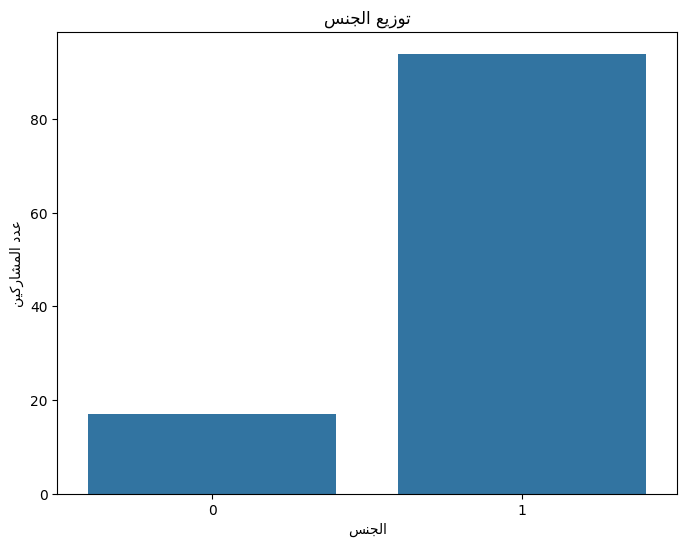

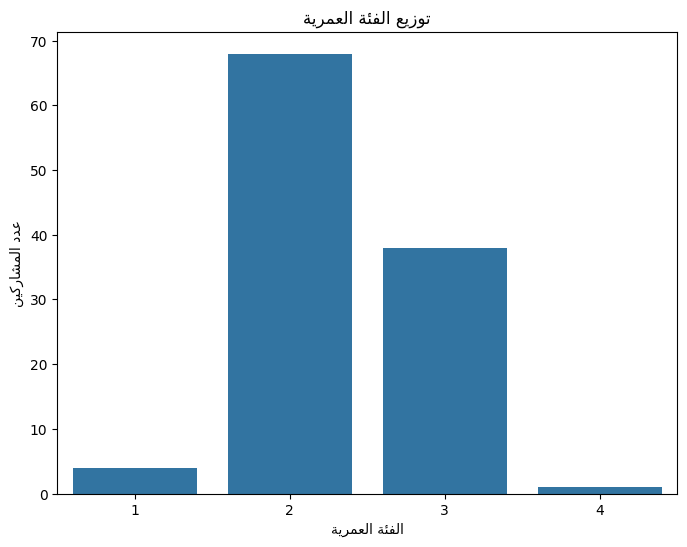

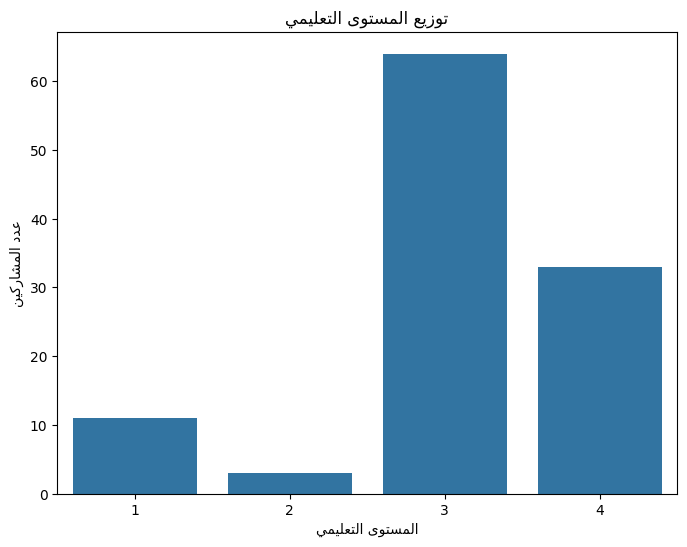

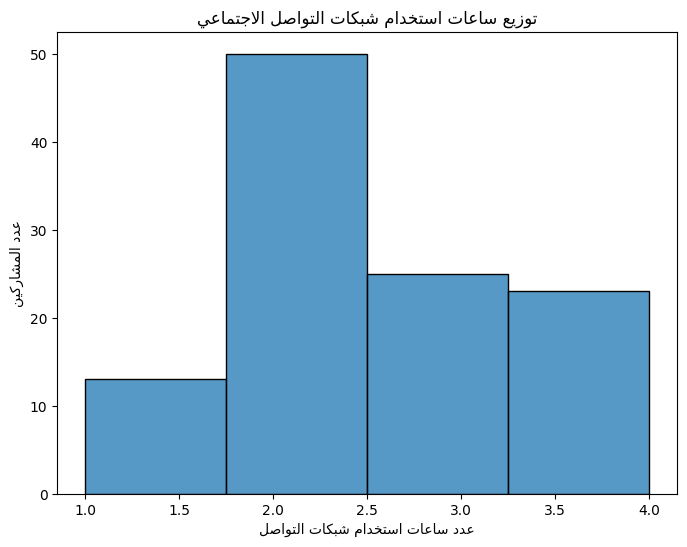

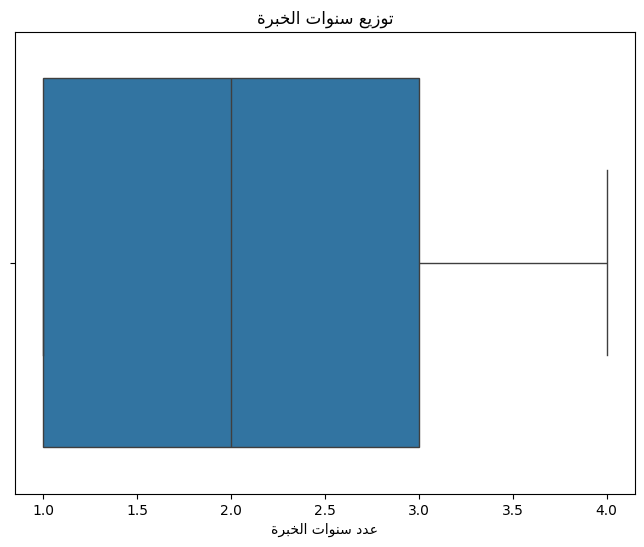

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Function to format Arabic titles
def arabic_title(title):
    reshaped_title = arabic_reshaper.reshape(title)
    return get_display(reshaped_title)

# Example of how to use this function in plotting
# Calculate descriptive statistics
desc_stats = data_cleaned.describe()
print("الإحصاءات الوصفية:\n", desc_stats)

# Create visualizations with Arabic titles

# Bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Jinsigaada ( الجنس )', data=data_cleaned)
plt.title(arabic_title("توزيع الجنس"))  # Apply the function to reshape and format the title
plt.xlabel(arabic_title("الجنس"))
plt.ylabel(arabic_title("عدد المشاركين"))
plt.show()

# Bar plot for age group distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Da\'daada ( الفئة العمرية)', data=data_cleaned)
plt.title(arabic_title("توزيع الفئة العمرية"))  # Apply the function to reshape and format the title
plt.xlabel(arabic_title("الفئة العمرية"))
plt.ylabel(arabic_title("عدد المشاركين"))
plt.show()

# Bar plot for education level distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Heerka Waxbarasho ( المؤهل العلمي )', data=data_cleaned)
plt.title(arabic_title("توزيع المستوى التعليمي"))  # Apply the function to reshape and format the title
plt.xlabel(arabic_title("المستوى التعليمي"))
plt.ylabel(arabic_title("عدد المشاركين"))
plt.show()

# Histogram for social media usage hours
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Saacadaha Aad Maalin kasta Ku Qaatid Isticmaalka Baraha Bulshada ( عدد ساعات استخدام شبكات التواصل يوميًا )'], bins=4)
plt.title(arabic_title("توزيع ساعات استخدام شبكات التواصل الاجتماعي"))  # Apply the function to reshape and format the title
plt.xlabel(arabic_title("عدد ساعات استخدام شبكات التواصل"))
plt.ylabel(arabic_title("عدد المشاركين"))
plt.show()

# Box plot for years of experience
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sanadaha Khibradeed aad uleedahay dhanka warbaahinta ama amniga ( عدد سنوات الخبرة في المجال الأمني أو الإعلامي )', data=data_cleaned)
plt.title(arabic_title("توزيع سنوات الخبرة"))  # Apply the function to reshape and format the title
plt.xlabel(arabic_title("عدد سنوات الخبرة"))
plt.show()
